In [6]:
import requests
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt

# Configuration
API_URL = "https://8f73-34-87-145-147.ngrok-free.app/"  # Update with your FastAPI server URL
IMAGE_PATH = "cat1.png"  # Path to your test PNG image
PROMPT = "Detect objects"  # Prompt for the API


In [12]:

# Test health check

url = "https://8f73-34-87-145-147.ngrok-free.app//health" 
response = requests.get(url)
if response.status_code == 200:
    print("Health Check:", response.json())
else:
    print(f"Health Check Failed: {response.status_code}")


Health Check: {'status': 'healthy'}


In [ ]:
import requests
import base64

# Your FastAPI/ngrok endpoint
url = "https://8f73-34-87-145-147.ngrok-free.app/process-image/"

# Local image to send
image_path = "cat1.png"

# The prompt your endpoint expects
prompt = "grayscale"

try:
    # Open image in binary mode
    with open(image_path, "rb") as img_file:
        # Tell requests this is a PNG
        files = {
            "file": (image_path, img_file, "image/png")
        }
        data = {"prompt": prompt}
        
        # POST multipart/form-data
        response = requests.post(url, files=files, data=data)
        response.raise_for_status()
    
    # Parse JSON
    resp_json = response.json()
    
    # The server returns "data:image/png;base64,...."
    img_data = resp_json["processed_image"]
    header, b64data = img_data.split(",", 1)
    
    # Decode & save the image
    img_bytes = base64.b64decode(b64data)
    
    # with open("processed_image.png", "wb") as out_file:
    #     out_file.write(img_bytes)
    
    print("✅ Processed image saved as processed_image.png")
    
    # Print out the YOLO results
    print("Bounding boxes:", resp_json.get("bounding_boxes"))
    print("Classes:       ", resp_json.get("classes"))
    print("Confidences:   ", resp_json.get("confidences"))

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error: {http_err} — {response.text}")
except Exception as err:
    print(f"Unexpected error: {err}")


✅ Processed image saved as processed_image.png
Bounding boxes: [[157.56076049804688, 7.039533615112305, 633.535888671875, 445.6722412109375], [86.52456665039062, 363.3024597167969, 957.0149536132812, 521.612548828125]]
Classes:        ['cat', 'dining table']
Confidences:    [0.9027537107467651, 0.28376132249832153]


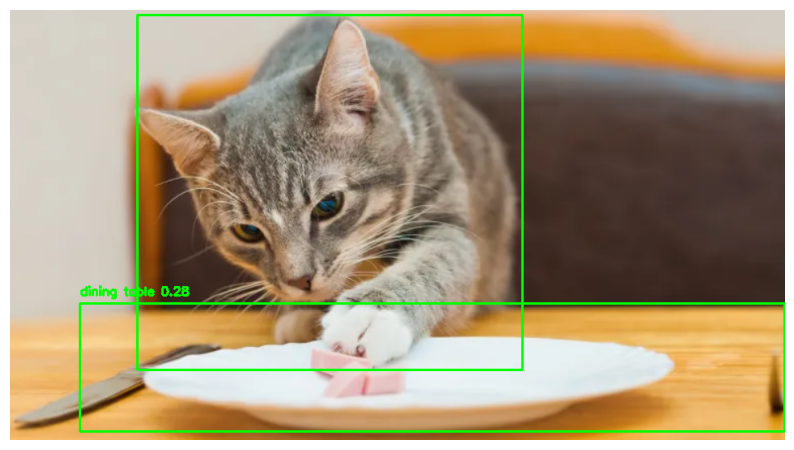

In [18]:
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Display the image with matplotlib
image = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(image)
plt.axis('off')
plt.show()